# AI for Film Analysis

## Manuel Meschiari, BA (11717108)  
### GenAI Final Project

### Notebook_1: First Experiments

In [1]:
import os
import openai
import base64
import requests
from IPython.display import Image, Audio
from openai import OpenAI

os.environ["OPENAI_API_KEY"] = "open_ai_key"
openai.api_key = os.environ["OPENAI_API_KEY"]
model="gpt-4o"

client = OpenAI()

## First experiment: prompting with OpenAI

In [2]:
#function

def process_image(image_path, prompt):
    with open(image_path, "rb") as image_file:
        myimage = base64.b64encode(image_file.read()).decode("utf-8")
    messages=[{"role": "system", "content": [{"type": "text", "text": f"{prompt}"}]},
              {"role": "user", "content": [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{myimage}"}}]},]
    response = client.chat.completions.create(model=model,
                                              messages=messages,
                                              temperature=1,
                                              max_tokens=256,
                                              top_p=1,
                                              frequency_penalty=0,
                                              presence_penalty=0,
                                             )
    return response.choices[0].message.content

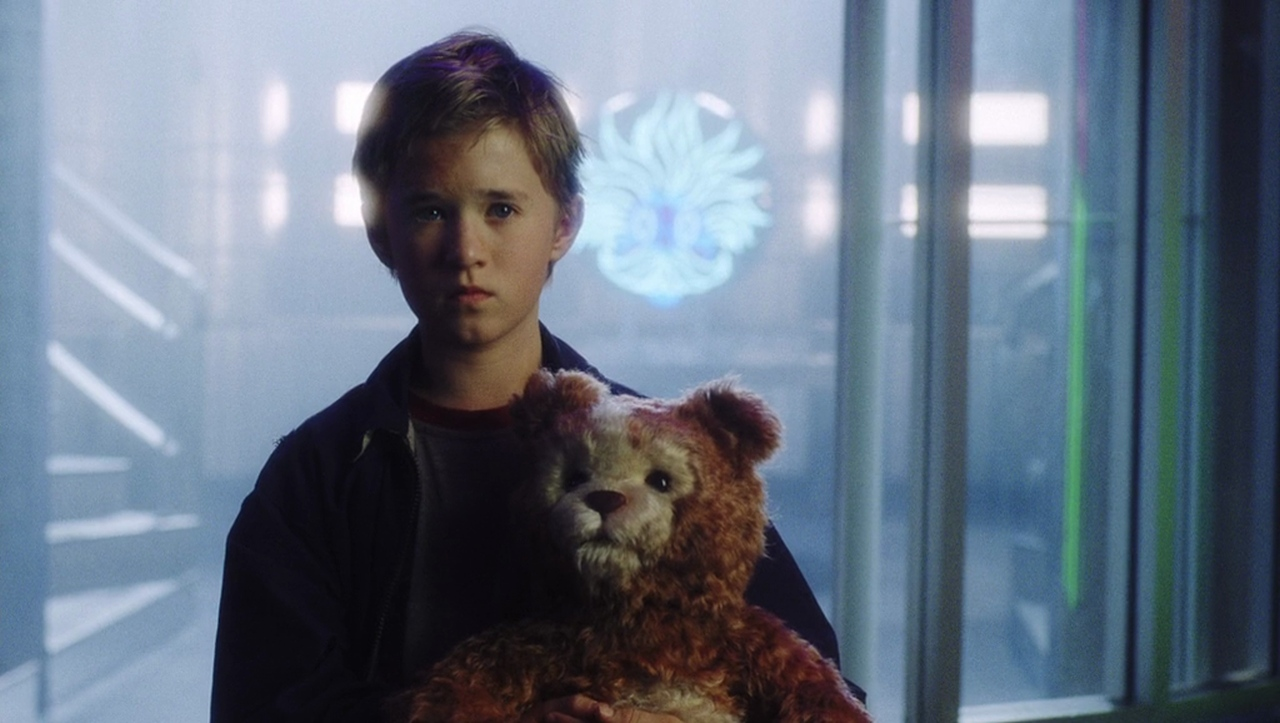

In [3]:
filename = "/Users/manuel.meschiari/Desktop/a-i-artificial-intelligence-2001-1900.jpg"
Image(filename=filename, width=500)

In [4]:
prompt = "You are an expert professor in the academic discipline of Film Studies. Describe this film still image. Say in one sentence what kind of shot this film still is"
print(process_image(filename, prompt))

This is a medium close-up shot featuring a young boy holding a teddy bear, with a blurred and slightly futuristic background adding a sense of atmosphere to the scene.


In [5]:
prompt = "You are an expert professor in the academic discipline of Film Studies. Describe this film still using an academic vocabulary and words from the film studies and film analysis field"
print(process_image(filename, prompt))

This film still features a young boy foregrounded in a medium-close shot, holding a teddy bear, with a backdrop of a futuristic and somewhat sterile environment. The use of mise-en-scène elements such as the soft blue and neon lighting contributes to a sense of otherworldliness and potentially a sci-fi genre setting. The boy's facial expression conveys a nuanced emotional state, possibly blending feelings of sadness, longing, or contemplation, which adds depth to his character's narrative arc. The framing of the shot emphasizes his solitude and isolation, as he is centered in the frame with the background slightly out of focus, directing the viewer's attention explicitly to his expression and the object he is holding. This compositional choice could signify an intimate psychological moment for the character. The contrasting textures between the metallic, sleek environment and the soft, cuddly teddy bear may symbolize a juxtaposition of innocence against a harsh reality, highlighting th

## Second experiment: prompting with Anthropic

In [3]:
pip install anthropic 

  Obtaining dependency information for anthropic from https://files.pythonhosted.org/packages/bb/60/83a677017292a1fffdcf5099a8fa8e0bb6176809ed48a4ac7b25cd1f280b/anthropic-0.29.0-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/packages/9d/64/6023d1717f1a5d577c8293518b01ec8abf2a6579ccc58292d24993c212c0/jiter-0.4.2-cp38-cp38-macosx_10_12_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.5/863.5 kB 17.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 21.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


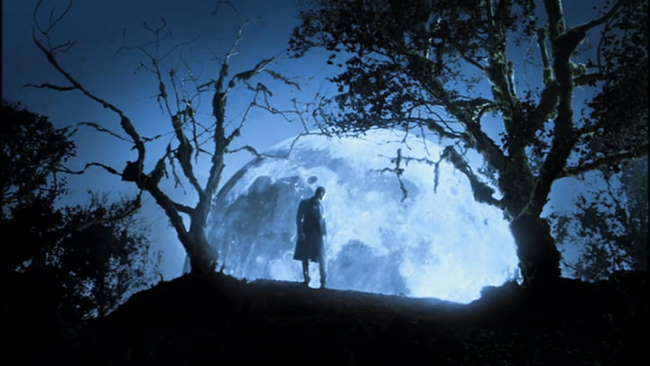

In [15]:
from PIL import Image
from IPython.display import display
img = Image.open('/Users/manuel.meschiari/Desktop/ai-artificialintelligence16.jpg')
display(img)

In [7]:
import base64
import httpx

image1_url = "https://static.anarchivism.org/cyberpunkreview-archive/www.cyberpunkreview.com/images/ai-artificialintelligence16.jpg"
image1_media_type = "image/jpeg"
image1_data = base64.b64encode(httpx.get(image1_url).content).decode("utf-8")

In [11]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key="anthropic_api_key",
)

message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1000,
    temperature=0,
    system="\nYou are a renowed film studies scholar.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image1_media_type,
                        "data": image1_data
                    }
                },
                {
                    "type": "text",
                    "text": "Conduct a film analysis of this film still using academic vocabulary from the film studies discipline."
                }
            ]
        }
    ]
)
print(message.content)

[TextBlock(text="This evocative film still presents a striking example of chiaroscuro lighting and silhouette composition, hallmarks of expressionist cinema and film noir aesthetics. The frame is dominated by a massive, luminous full moon that serves as a powerful backlight, creating a high-contrast image with deep shadows in the foreground.\n\nThe mise-en-scène is carefully constructed to create a sense of mystery and foreboding. Two gnarled trees frame the shot, their bare branches reaching across the sky like skeletal fingers, adding to the ominous atmosphere. The silhouette of a solitary figure stands centrally positioned against the moon, a classic visual motif that suggests isolation, introspection, or a pivotal moment of transformation in the narrative.\n\nThe color palette is restricted to cool blues and stark blacks, enhancing the nocturnal mood and potentially symbolizing emotional coldness or the unknown. This monochromatic approach is reminiscent of early color experiments 

## Third Experiment: Huggingface Model

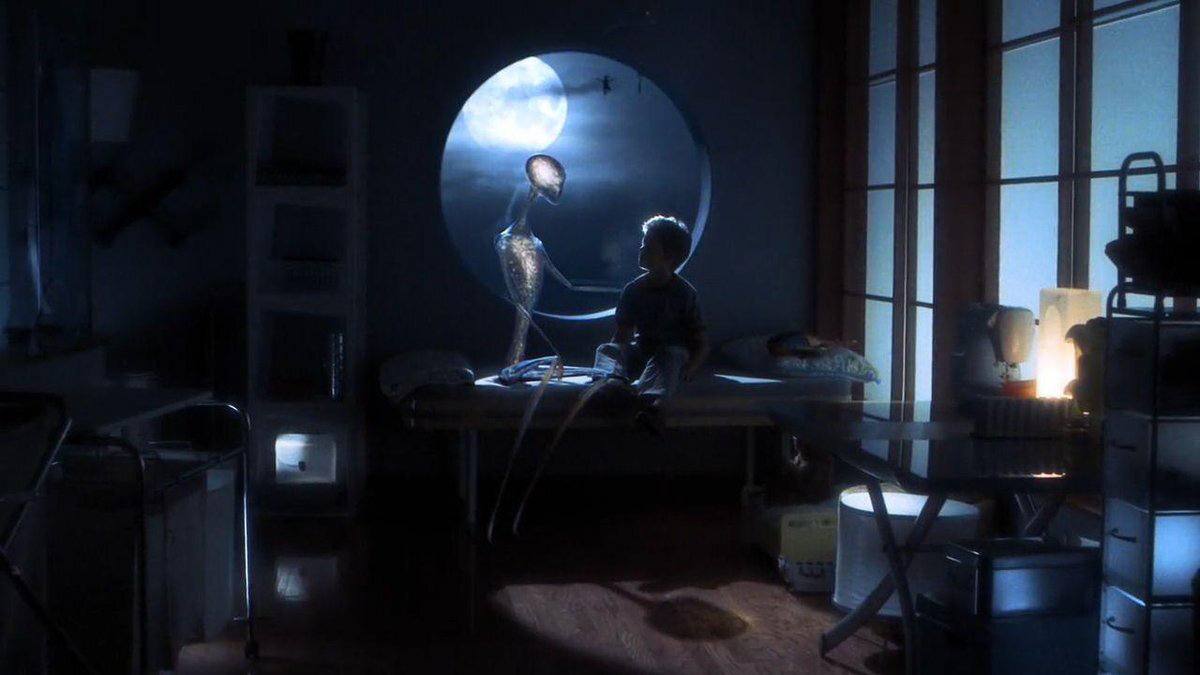

In [3]:
from PIL import Image
from IPython.display import display
import urllib.request
from io import BytesIO 

url = 'https://images.squarespace-cdn.com/content/v1/60bffae317f9f602a787a04c/1624929485831-H2L9V8EZ7NEYRU4B8NYE/AIScreenshot4.jpg'
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

In [4]:
from transformers import pipeline
from PIL import Image
import requests

pipe = pipeline(
    "image-classification",
    model="pszemraj/beit-large-patch16-512-film-shot-classifier",
)

shot = "https://images.squarespace-cdn.com/content/v1/60bffae317f9f602a787a04c/1624929485831-H2L9V8EZ7NEYRU4B8NYE/AIScreenshot4.jpg"
image = Image.open(requests.get(shot, stream=True).raw)
result = pipe(image)[0]
print(result)

Some weights of BeitForImageClassification were not initialized from the model checkpoint at pszemraj/beit-large-patch16-512-film-shot-classifier and are newly initialized: ['beit.encoder.layer.11.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.7.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.18.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.12.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.20.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.17.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.23.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.5.attention.attention.relative_position_bias.relative_position_index', 'beit.encoder.layer.6.attention.attention.relative_position_bias.relative_position_index', '

{'score': 0.9959761500358582, 'label': 'longShot'}
